In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Pandas for managing datasets
import pandas as pd
import numpy as np
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff

/home/kapadais/github/hua-thesis


In [7]:
real_data =  pd.read_csv("../data/route.csv")
real_data = real_data [["TIMESTAMP","LAT","LON","HEADING"]]
real_data.sort_values('TIMESTAMP',inplace=True)
real_data=real_data.reset_index(drop=True)

In [8]:
# n_split = len(real_data)/train_test_options["split"]
# real_data = np.split(real_data, n_split)

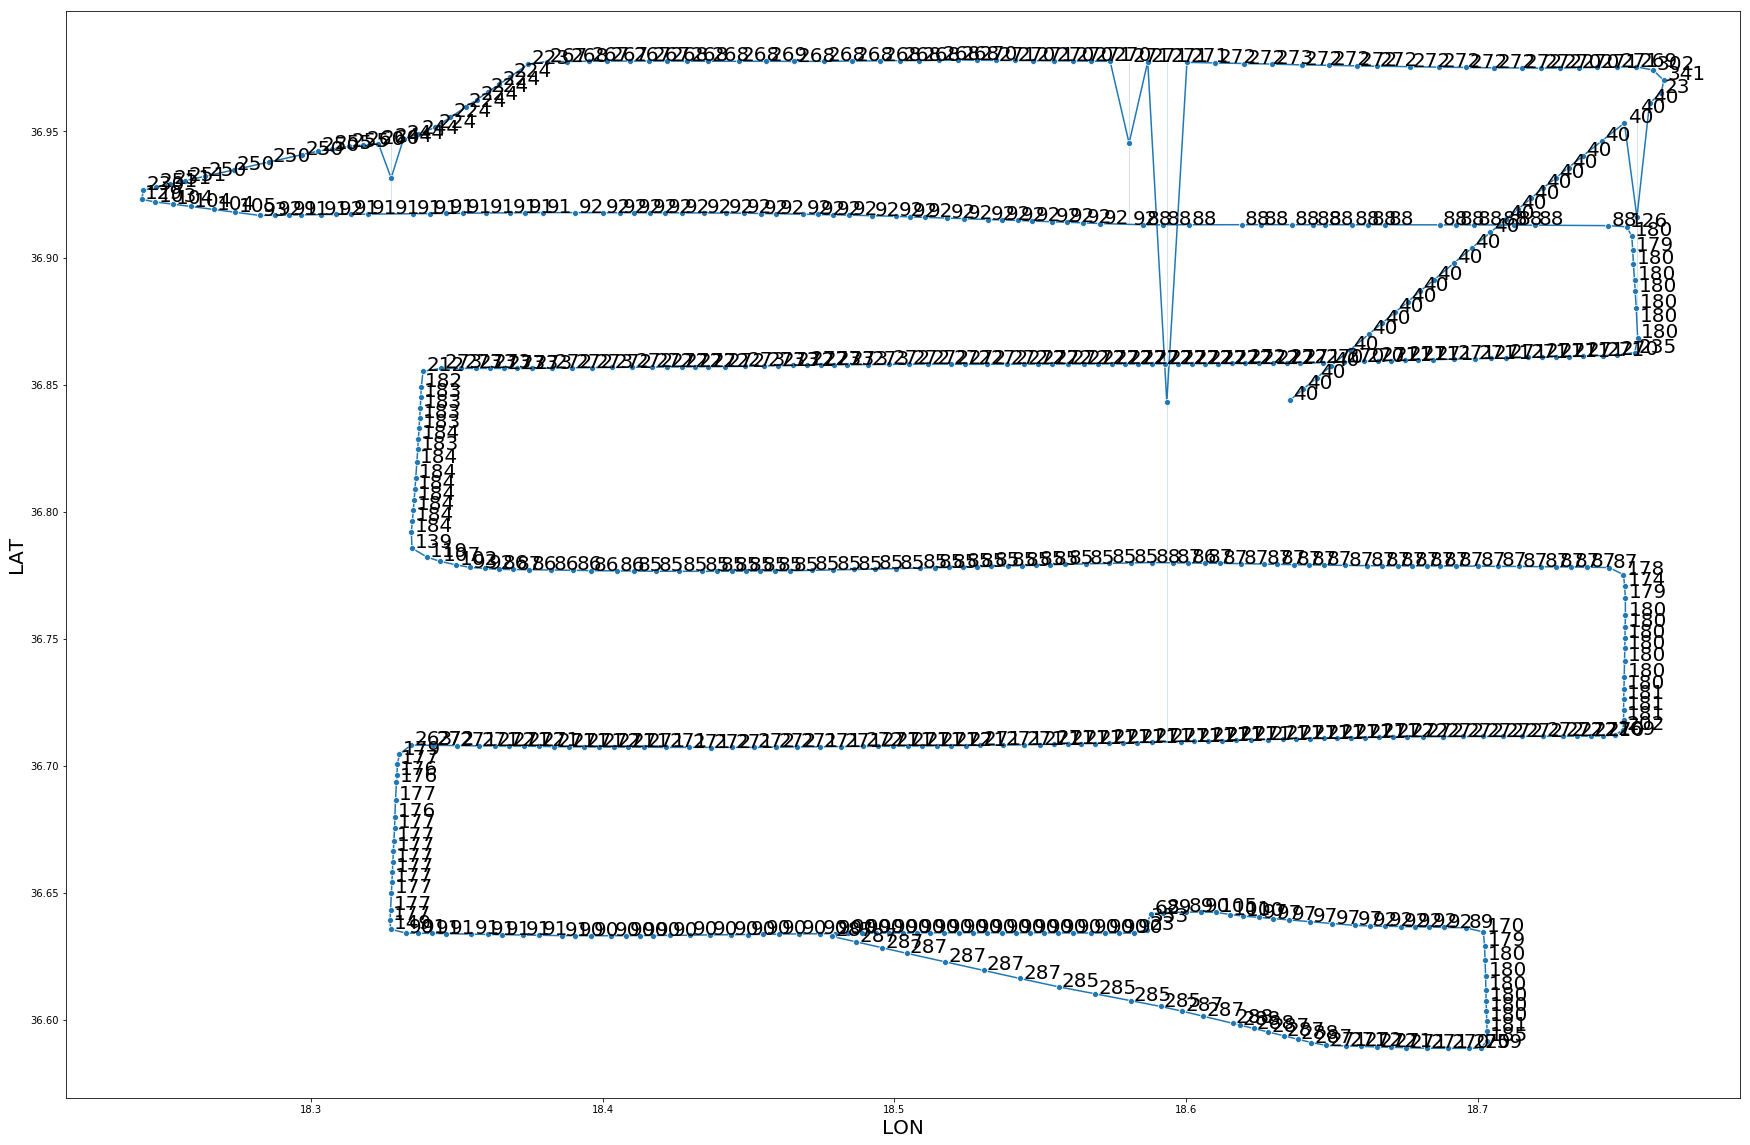

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
data=real_data
# Plot using Seaborn
sns.lineplot(x='LON', y='LAT', data=data, ax=ax,sort=False,marker="o")
for j, point in data.iterrows():
    ax.text(point['LON']+0.0011, point['LAT'], str(point['HEADING']),fontsize=20)